In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [53]:
df=pd.read_csv('uberdrive.csv')

In [54]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [55]:
df.shape

(1156, 7)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [57]:
df.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [58]:
df.size

8092

In [59]:
df.isnull().values.any()

True

In [60]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [61]:
df.duplicated().sum()

1

In [62]:
df=df.dropna()

In [63]:
df.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

# What us the Unique Start Destination?

In [64]:
un_start_dest=set(df['START*'])
print(un_start_dest)

{'Jamaica', 'Topton', 'Hazelwood', 'Chessington', 'Farmington Woods', 'Galveston', 'Newark', 'North Austin', 'Savon Height', 'Seattle', 'Briar Meadow', 'Redmond', 'West Berkeley', 'Kenner', 'South Congress', 'Ingleside', 'Noorpur Shahan', 'East Elmhurst', 'Edgehill Farms', 'East Harlem', 'Stonewater', 'Fayetteville Street', 'Jacksonville', 'Nugegoda', 'CBD', 'Port Bolivar', 'Krendle Woods', 'Kissimmee', 'Eastgate', 'Eagan Park', 'Heritage Pines', 'Medical Centre', 'New Orleans', 'East Austin', 'Kilarney Woods', 'Lahore', 'Cary', 'Katunayake', 'Old City', 'Georgian Acres', 'Tanglewood', 'Islamabad', 'Huntington Woods', 'New York', 'Wayne Ridge', 'Menlo Park', 'Sugar Land', 'Long Island City', 'Katunayaka', 'Gulfton', 'Ridgeland', 'Latta', 'Lexington Park at Amberly', 'Palo Alto', 'Lower Manhattan', 'Arabi', 'Austin', 'Weston', 'R?walpindi', 'Storyville', 'Pontchartrain Shores', 'Parkwood', 'Flatiron District', 'Houston', 'West Palm Beach', 'Capitol One', 'Summerwinds', 'Apex', 'Midtown 

In [65]:
len(un_start_dest)

131

# What is the most popular starting Point?

In [66]:
start_dest_count=(df['START*']).value_counts()
start_dest_count=start_dest_count.sort_values(ascending=False)
mostpop=pd.DataFrame(start_dest_count)
mostpop=mostpop.reset_index()
mostpop=mostpop.rename(columns={'index':'starting_Destination','START*':'Count'})
mostpop.head()

,starting_Destination,Count
0,Cary,161
1,Unknown Location,55
2,Morrisville,54
3,Whitebridge,36
4,Durham,30


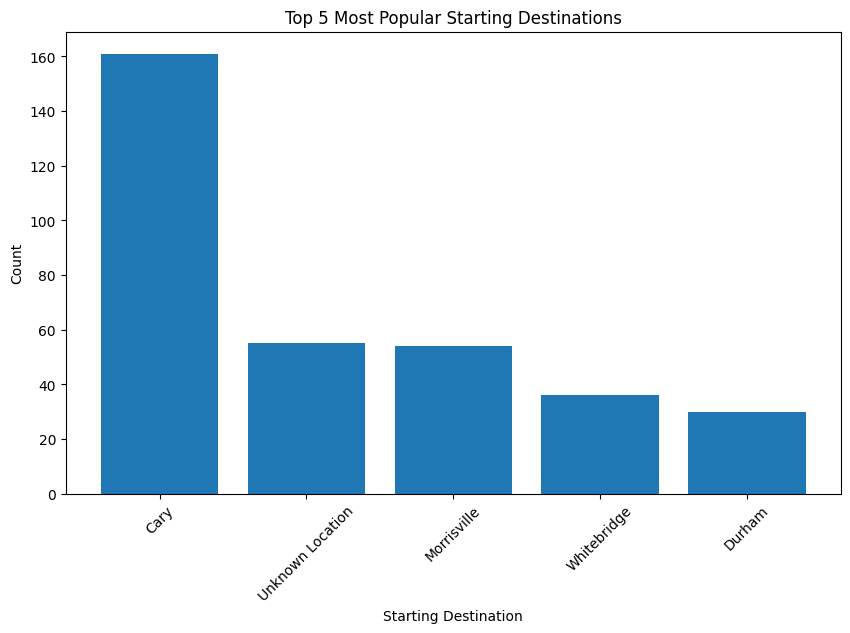

In [67]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(mostpop['starting_Destination'].head(), mostpop['Count'].head())
plt.xlabel('Starting Destination')
plt.ylabel('Count')
plt.title('Top 5 Most Popular Starting Destinations')
plt.xticks(rotation=45)

# Displaying the plot
plt.show()


# What is the most popular ending Point?


In [68]:
end_dest_count=(df['STOP*']).value_counts()
end_dest_count=end_dest_count.sort_values(ascending=False)
mostpop=pd.DataFrame(end_dest_count)
mostpop=mostpop.reset_index()
mostpop=mostpop.rename(columns={'index':'stop_Destination','STOP*':'Count'})
mostpop.head()

,stop_Destination,Count
0,Cary,155
1,Morrisville,60
2,Unknown Location,56
3,Whitebridge,37
4,Durham,30


# What is the most Frequent Route?



In [69]:
route_df=pd.DataFrame(df.groupby(['START*','STOP*']).size())
route_df=route_df.rename(columns={0:'Count'})
route_df=route_df.sort_values(by='Count',ascending=False)
route_df

Count
START*           STOP*                  
Cary             Morrisville          52
Morrisville      Cary                 51
Cary             Cary                 44
Unknown Location Unknown Location     30
Cary             Durham               30
...                                  ...
Katunayaka       Katunayaka            1
                 Unknown Location      1
Katunayake       Gampaha               1
Katy             Houston               1
Winston Salem    Asheville             1

[239 rows x 1 columns]

# What is the most popular Purpose?



In [71]:
purp_count=(df['PURPOSE*']).value_counts()
purp_count=purp_count.sort_values(ascending=False)
mostpop=pd.DataFrame(purp_count)
mostpop=mostpop.reset_index()
mostpop=mostpop.rename(columns={'index':'Purpose','PURPOSE*':'Count'})
mostpop.head()

,Purpose,Count
0,Meeting,187
1,Meal/Entertain,160
2,Errand/Supplies,128
3,Customer Visit,101
4,Temporary Site,50


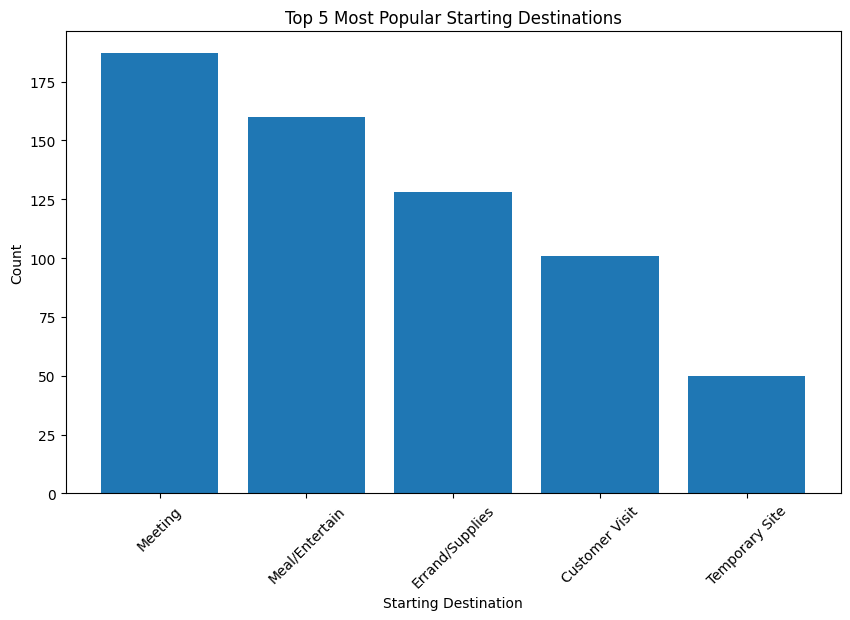

In [73]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(mostpop['Purpose'].head(), mostpop['Count'].head())
plt.xlabel('Starting Destination')
plt.ylabel('Count')
plt.title('Top 5 Most Popular Starting Destinations')
plt.xticks(rotation=45)

# Displaying the plot
plt.show()
